In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Data from Green Mountain West Trail

In [2]:
datadir = '../data/half-dome-trail/'
datafile = datadir + 'half-dome-trail.csv'
metafile = datadir + 'half-dome-trail_metadata.csv'

data = pd.read_csv(datafile)
meta = pd.read_csv(metafile)

print("Title: "+meta['Title'][0])
print("Distance: "+str(meta['Distance (mi)'][0]) + ' miles')
print("Elevation Gain: "+str(meta['Elevation Gain (ft)'][0])+" feet")
print("URL: https://www.alltrails.com/trail/us/california/half-dome-trail")

Title: Half Dome Trail - California
Distance: 15.0 miles
Elevation Gain: 5206.0 feet
URL: https://www.alltrails.com/trail/us/california/half-dome-trail


# Clean Data
Users can upload routes that do not exactly match the route described on the main page. This leads to outliers in the data. To filter out these outliers, I require that the recorded distance for each user activity is within 10% of the total distance on the route.

Found 386 clean rows out of 870


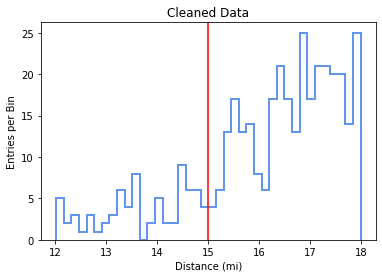

In [3]:
distances = np.array(data['Distance (mi)'])
distance_ref = np.array(meta['Distance (mi)'])[0]

clean = np.absolute(distances-distance_ref)/distance_ref < 0.2 # require distance within 10% of quoted reference

print("Found "+str(np.count_nonzero(clean))+" clean rows out of "+str(len(clean)))

color = 'cornflowerblue'
plt.figure()
plt.hist(distances[clean], color=color, histtype='step', lw=2, bins=40)
plt.axvline(distance_ref, color='red')
plt.title("Cleaned Data")
plt.xlabel('Distance (mi)')
plt.ylabel('Entries per Bin')
plt.show()

# Plot Distribution of Times

## Total Elapsed Time

Fastest Time: 0.0 hrs
Typical Time: 11.06 +/- 2.36 hrs
Slowest Time: 16.66 hrs


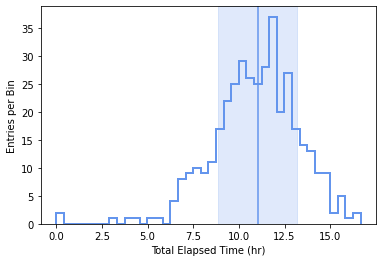

In [4]:
total = np.array(data['Total Time (s)'])/(60.*60.) # in hours

tlower, tmedian, tupper = np.percentile(total[clean], [16, 50, 84])

print("Fastest Time: "+str(round(np.amin(total[clean]), 2))+" hrs")
print("Typical Time: "+str(round(tmedian, 2))+" +/- "+str(round(np.std(total[clean]),2))+ " hrs")
print("Slowest Time: "+str(round(np.amax(total[clean]), 2))+" hrs")

color = 'cornflowerblue'
plt.figure()
plt.hist(total[clean], bins=40, color=color, lw=2, histtype='step', label='Total Time')
plt.axvline(tmedian, color=color)
plt.axvspan(tlower, tupper, color=color, alpha=0.2)
plt.xlabel('Total Elapsed Time (hr)')
plt.ylabel('Entries per Bin')
plt.show()

## Moving Time

Fastest Time: 0.0 hrs
Typical Time: 8.26 +/- 1.75 hrs
Slowest Time: 12.05 hrs


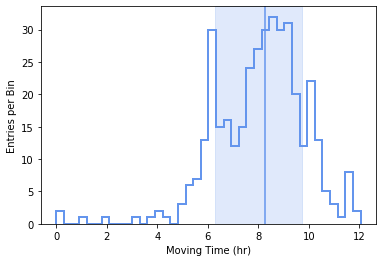

In [5]:
moving = np.array(data['Moving Time (s)'])/(60.*60.) # in hours

tlower, tmedian, tupper = np.percentile(moving[clean], [16, 50, 84])

print("Fastest Time: "+str(round(np.amin(moving[clean]), 2))+" hrs")
print("Typical Time: "+str(round(tmedian, 2))+" +/- "+str(round(np.std(moving[clean]),2))+ " hrs")
print("Slowest Time: "+str(round(np.amax(moving[clean]), 2))+" hrs")

color = 'cornflowerblue'
plt.figure()
plt.hist(moving[clean], bins=40, color=color, lw=2, histtype='step', label='Total Time')
plt.axvline(tmedian, color=color)
plt.axvspan(tlower, tupper, color=color, alpha=0.2)
plt.xlabel('Moving Time (hr)')
plt.ylabel('Entries per Bin')
plt.show()